In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')  
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tqdm import tqdm_notebook

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import os
# for dirname, _, filenames in os.walk('data'):
# #     print(os.path.join(dirname, filenames))
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
cd {dirname}

[Errno 2] No such file or directory: '{dirname}'
/home/jovyan/midterm/aidea


In [3]:
df_mix=pd.read_csv("/home/jovyan/midterm/aidea/data/report.csv")
# df_test=pd.read_csv("./test.csv")
# df_mix=df_test.merge(df_train,how="outer")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df_mix.__len__())

37517


In [5]:
len(df_mix.columns)

21

# Columns Rename

In [6]:
df_mix.rename(columns={"1":"ID"}, inplace=True)
df_mix.rename(columns={"2":"資料年度"}, inplace=True)
df_mix.rename(columns={"3":"資料月份"}, inplace=True)
df_mix.rename(columns={"4":"酪農場代號"}, inplace=True)
df_mix.rename(columns={"5":"乳牛編號"}, inplace=True)
df_mix.rename(columns={"6":"父親牛精液編號"}, inplace=True)
df_mix.rename(columns={"7":"母親乳牛編號"}, inplace=True)
df_mix.rename(columns={"8":"出生日期"}, inplace=True)
df_mix.rename(columns={"9":"胎次"}, inplace=True)
df_mix.rename(columns={"10":"泌乳天數"}, inplace=True)
df_mix.rename(columns={"11":"乳量"}, inplace=True)
df_mix.rename(columns={"12":"最近分娩日期"}, inplace=True)
df_mix.rename(columns={"13":"採樣日期"}, inplace=True)
df_mix.rename(columns={"14":"月齡"}, inplace=True)
df_mix.rename(columns={"15":"檢測日期"}, inplace=True)
df_mix.rename(columns={"16":"最後配種日期"}, inplace=True)
df_mix.rename(columns={"17":"最後配種精液"}, inplace=True)
df_mix.rename(columns={"18":"配種次數"}, inplace=True)
df_mix.rename(columns={"19":"前次分娩日期"}, inplace=True)
df_mix.rename(columns={"20":"第一次配種日期"}, inplace=True)
df_mix.rename(columns={"21":"第一次配種精液"}, inplace=True)

# Merge Columns

In [7]:
# df_mix['資料日期'] = df_mix.agg(lambda x: f"{x['資料年度']}/{x['資料月份']}/01", axis=1)
# df_mix

In [8]:
df_tmp=df_mix.iloc[:2].drop(columns=["乳量",'ID'])

In [9]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 21 columns):
ID         37517 non-null int64
資料年度       37517 non-null int64
資料月份       37517 non-null int64
酪農場代號      37517 non-null object
乳牛編號       37517 non-null int64
父親牛精液編號    36641 non-null object
母親乳牛編號     33933 non-null object
出生日期       37517 non-null object
胎次         37517 non-null int64
泌乳天數       37516 non-null float64
乳量         33254 non-null float64
最近分娩日期     37516 non-null object
採樣日期       37517 non-null object
月齡         37517 non-null int64
檢測日期       37517 non-null object
最後配種日期     35981 non-null object
最後配種精液     35981 non-null object
配種次數       37517 non-null int64
前次分娩日期     20097 non-null object
第一次配種日期    36086 non-null object
第一次配種精液    36086 non-null object
dtypes: float64(2), int64(7), object(12)
memory usage: 6.0+ MB


In [10]:
df_mix.describe()

,ID,資料年度,資料月份,乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數
count,37517.000000,37517.000000,37517.000000,3.751700e+04,37517.000000,37516.000000,33254.000000,37517.000000,37517.000000
mean,18759.000000,2016.126529,6.202068,2.345295e+07,1.959618,204.897510,23.991659,47.462137,1.961271
std,10830.369361,1.905908,3.397154,3.929861e+07,1.222761,149.727124,8.742980,19.257433,2.121853
min,1.000000,2013.000000,1.000000,5.261200e+04,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9380.000000,2015.000000,3.000000,1.181884e+06,1.000000,88.000000,18.000000,33.000000,0.000000
50%,18759.000000,2016.000000,6.000000,3.126107e+06,2.000000,180.000000,23.400000,43.000000,1.000000
75%,28138.000000,2018.000000,9.000000,1.083749e+07,2.000000,286.000000,30.000000,56.000000,3.000000
max,37517.000000,2019.000000,12.000000,9.918321e+07,11.000000,1789.000000,61.000000,160.000000,16.000000


In [11]:
for i in df_mix.columns:
    print(f"{i}\t\t:{df_mix[i].isna().sum()}/{df_mix.__len__()} : {df_mix[i].isna().sum()/df_mix.__len__() * 100:.2f}%")

ID		:0/37517 : 0.00%
資料年度		:0/37517 : 0.00%
資料月份		:0/37517 : 0.00%
酪農場代號		:0/37517 : 0.00%
乳牛編號		:0/37517 : 0.00%
父親牛精液編號		:876/37517 : 2.33%
母親乳牛編號		:3584/37517 : 9.55%
出生日期		:0/37517 : 0.00%
胎次		:0/37517 : 0.00%
泌乳天數		:1/37517 : 0.00%
乳量		:4263/37517 : 11.36%
最近分娩日期		:1/37517 : 0.00%
採樣日期		:0/37517 : 0.00%
月齡		:0/37517 : 0.00%
檢測日期		:0/37517 : 0.00%
最後配種日期		:1536/37517 : 4.09%
最後配種精液		:1536/37517 : 4.09%
配種次數		:0/37517 : 0.00%
前次分娩日期		:17420/37517 : 46.43%
第一次配種日期		:1431/37517 : 3.81%
第一次配種精液		:1431/37517 : 3.81%


# Separate number, binary, object and date

In [12]:
all_cols=df_tmp.columns.values
num_cols=list(df_tmp[all_cols]._get_numeric_data().columns.values)
df_mix[num_cols]

,資料年度,資料月份,乳牛編號,胎次,泌乳天數,月齡,配種次數
0,2013,3,52612,1,78.0,26,1
1,2013,4,52612,1,107.0,27,1
2,2013,5,52612,1,140.0,28,2
3,2013,6,52612,1,175.0,29,2
4,2013,7,52612,1,210.0,30,2
...,...,...,...,...,...,...,...
37512,2014,1,93184912,8,12.0,130,0
37513,2014,5,93184912,8,137.0,134,0
37514,2014,6,93184912,8,168.0,135,0
37515,2014,7,93184912,8,197.0,136,0


In [13]:
num_cols=[col for col in num_cols if col!="乳牛編號"]
num_cols

['資料年度', '資料月份', '胎次', '泌乳天數', '月齡', '配種次數']

In [14]:
#not numeric data
tmp_cols=np.setdiff1d(all_cols,num_cols)
tmp_cols

array(['乳牛編號', '出生日期', '前次分娩日期', '採樣日期', '最後配種日期', '最後配種精液', '最近分娩日期',
       '檢測日期', '母親乳牛編號', '父親牛精液編號', '第一次配種日期', '第一次配種精液', '酪農場代號'],
      dtype=object)

In [15]:
#is binary data
@np.vectorize
def is_bool(x):
    return x in [True,False]
cat_cols=tmp_cols[np.logical_or(~is_bool(df_mix[tmp_cols].values[0]),~is_bool(df_mix[tmp_cols].values[1]))]

In [16]:
date_cols=np.array([cont for cont in cat_cols if "日期" in cont ])
cat_cols=np.setdiff1d(tmp_cols,date_cols)

In [17]:
df_mix[cat_cols].head()

,乳牛編號,最後配種精液,母親乳牛編號,父親牛精液編號,第一次配種精液,酪農場代號
0,52612,507H11621,96040545,507H7173,501H8784,A
1,52612,507H11621,96040545,507H7173,501H8784,A
2,52612,507H11621,96040545,507H7173,501H8784,A
3,52612,507H11621,96040545,507H7173,501H8784,A
4,52612,507H11621,96040545,507H7173,501H8784,A


# Date Data

In [18]:
df_mix[date_cols].head()

,出生日期,前次分娩日期,採樣日期,最後配種日期,最近分娩日期,檢測日期,第一次配種日期
0,2011/1/1 00:00,NaN,2013/3/20 00:00,2015/5/5 00:00,2013/1/1 00:00,2013/3/21 00:00,2013/3/5 00:00
1,2011/1/1 00:00,NaN,2013/4/18 00:00,2015/5/5 00:00,2013/1/1 00:00,2013/4/19 00:00,2013/3/5 00:00
2,2011/1/1 00:00,NaN,2013/5/21 00:00,2015/5/5 00:00,2013/1/1 00:00,2013/5/22 00:00,2013/3/5 00:00
3,2011/1/1 00:00,NaN,2013/6/25 00:00,2015/5/5 00:00,2013/1/1 00:00,2013/6/26 00:00,2013/3/5 00:00
4,2011/1/1 00:00,NaN,2013/7/30 00:00,2015/5/5 00:00,2013/1/1 00:00,2013/7/31 00:00,2013/3/5 00:00


In [19]:
for i in date_cols:
    print(f"{i}\t\t:{df_mix[i].isna().sum()}/{df_mix.__len__()} : {df_mix[i].isna().sum()/df_mix.__len__() * 100:.2f}%")

出生日期		:0/37517 : 0.00%
前次分娩日期		:17420/37517 : 46.43%
採樣日期		:0/37517 : 0.00%
最後配種日期		:1536/37517 : 4.09%
最近分娩日期		:1/37517 : 0.00%
檢測日期		:0/37517 : 0.00%
第一次配種日期		:1431/37517 : 3.81%


In [20]:
# pd.to_timedelta(df_mix[date_cols]).dt.total_seconds()

for i in date_cols:
    df_mix[i] = df_mix[i].str.replace('/','-')
    df_mix[i] = df_mix[i].str.replace(' 00:00','')
    df_mix[i] = pd.to_datetime(df_mix[i], errors='coerce')


In [21]:
df_mix[date_cols]

,出生日期,前次分娩日期,採樣日期,最後配種日期,最近分娩日期,檢測日期,第一次配種日期
0,2011-01-01,NaT,2013-03-20,2015-05-05,2013-01-01,2013-03-21,2013-03-05
1,2011-01-01,NaT,2013-04-18,2015-05-05,2013-01-01,2013-04-19,2013-03-05
2,2011-01-01,NaT,2013-05-21,2015-05-05,2013-01-01,2013-05-22,2013-03-05
3,2011-01-01,NaT,2013-06-25,2015-05-05,2013-01-01,2013-06-26,2013-03-05
4,2011-01-01,NaT,2013-07-30,2015-05-05,2013-01-01,2013-07-31,2013-03-05
...,...,...,...,...,...,...,...
37512,2003-03-08,2012-11-16,2014-01-20,NaT,2014-01-08,2014-01-21,NaT
37513,2003-03-08,2012-11-16,2014-05-25,NaT,2014-01-08,2014-05-26,NaT
37514,2003-03-08,2012-11-16,2014-06-25,NaT,2014-01-08,2014-06-26,NaT
37515,2003-03-08,2012-11-16,2014-07-24,NaT,2014-01-08,2014-07-25,NaT


In [22]:
# df_mix['出生日期'] = df_mix['出生日期'] - pd.datetime.now()
# df_mix['出生日期'].dt.total_seconds()
# df_mix['出生日期']

In [23]:
# df_mix['出生日期']

# Categorical Data

In [24]:
#is categorical data
df_mix[cat_cols]

,乳牛編號,最後配種精液,母親乳牛編號,父親牛精液編號,第一次配種精液,酪農場代號
0,52612,507H11621,96040545,507H7173,501H8784,A
1,52612,507H11621,96040545,507H7173,501H8784,A
2,52612,507H11621,96040545,507H7173,501H8784,A
3,52612,507H11621,96040545,507H7173,501H8784,A
4,52612,507H11621,96040545,507H7173,501H8784,A
...,...,...,...,...,...,...
37512,93184912,NaN,8.51715e+07,14H1999,NaN,C
37513,93184912,NaN,8.51715e+07,14H1999,NaN,C
37514,93184912,NaN,8.51715e+07,14H1999,NaN,C
37515,93184912,NaN,8.51715e+07,14H1999,NaN,C


In [25]:
for i in cat_cols:
    print(f'{i} unique : {len(df_mix[i].unique())} \n')


乳牛編號 unique : 1991 

最後配種精液 unique : 202 

母親乳牛編號 unique : 1267 

父親牛精液編號 unique : 344 

第一次配種精液 unique : 217 

酪農場代號 unique : 3 



# Fill NA

In [26]:
df_mix[cat_cols].head()

,乳牛編號,最後配種精液,母親乳牛編號,父親牛精液編號,第一次配種精液,酪農場代號
0,52612,507H11621,96040545,507H7173,501H8784,A
1,52612,507H11621,96040545,507H7173,501H8784,A
2,52612,507H11621,96040545,507H7173,501H8784,A
3,52612,507H11621,96040545,507H7173,501H8784,A
4,52612,507H11621,96040545,507H7173,501H8784,A


In [27]:
for i in cat_cols:
    df_mix[i].fillna('other',inplace=True)
    
df_mix[cat_cols]

,乳牛編號,最後配種精液,母親乳牛編號,父親牛精液編號,第一次配種精液,酪農場代號
0,52612,507H11621,96040545,507H7173,501H8784,A
1,52612,507H11621,96040545,507H7173,501H8784,A
2,52612,507H11621,96040545,507H7173,501H8784,A
3,52612,507H11621,96040545,507H7173,501H8784,A
4,52612,507H11621,96040545,507H7173,501H8784,A
...,...,...,...,...,...,...
37512,93184912,other,8.51715e+07,14H1999,other,C
37513,93184912,other,8.51715e+07,14H1999,other,C
37514,93184912,other,8.51715e+07,14H1999,other,C
37515,93184912,other,8.51715e+07,14H1999,other,C


In [28]:
for i in date_cols:
    df_mix[i].fillna(pd.Timestamp('20220101'),inplace=True)
    
df_mix[date_cols]

,出生日期,前次分娩日期,採樣日期,最後配種日期,最近分娩日期,檢測日期,第一次配種日期
0,2011-01-01,2022-01-01,2013-03-20,2015-05-05,2013-01-01,2013-03-21,2013-03-05
1,2011-01-01,2022-01-01,2013-04-18,2015-05-05,2013-01-01,2013-04-19,2013-03-05
2,2011-01-01,2022-01-01,2013-05-21,2015-05-05,2013-01-01,2013-05-22,2013-03-05
3,2011-01-01,2022-01-01,2013-06-25,2015-05-05,2013-01-01,2013-06-26,2013-03-05
4,2011-01-01,2022-01-01,2013-07-30,2015-05-05,2013-01-01,2013-07-31,2013-03-05
...,...,...,...,...,...,...,...
37512,2003-03-08,2012-11-16,2014-01-20,2022-01-01,2014-01-08,2014-01-21,2022-01-01
37513,2003-03-08,2012-11-16,2014-05-25,2022-01-01,2014-01-08,2014-05-26,2022-01-01
37514,2003-03-08,2012-11-16,2014-06-25,2022-01-01,2014-01-08,2014-06-26,2022-01-01
37515,2003-03-08,2012-11-16,2014-07-24,2022-01-01,2014-01-08,2014-07-25,2022-01-01


In [29]:
df_mix

,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,出生日期,胎次,泌乳天數,乳量,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,最後配種精液,配種次數,前次分娩日期,第一次配種日期,第一次配種精液
0,1,2013,3,A,52612,507H7173,96040545,2011-01-01,1,78.0,29.4,2013-01-01,2013-03-20,26,2013-03-21,2015-05-05,507H11621,1,2022-01-01,2013-03-05,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011-01-01,1,107.0,27.8,2013-01-01,2013-04-18,27,2013-04-19,2015-05-05,507H11621,1,2022-01-01,2013-03-05,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011-01-01,1,140.0,9.0,2013-01-01,2013-05-21,28,2013-05-22,2015-05-05,507H11621,2,2022-01-01,2013-03-05,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011-01-01,1,175.0,13.0,2013-01-01,2013-06-25,29,2013-06-26,2015-05-05,507H11621,2,2022-01-01,2013-03-05,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011-01-01,1,210.0,13.2,2013-01-01,2013-07-30,30,2013-07-31,2015-05-05,507H11621,2,2022-01-01,2013-03-05,501H8784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,37513,2014,1,C,93184912,14H1999,8.51715e+07,2003-03-08,8,12.0,20.0,2014-01-08,2014-01-20,130,2014-01-21,2022-01-01,other,0,2012-11-16,2022-01-01,other
37513,37514,2014,5,C,93184912,14H1999,8.51715e+07,2003-03-08,8,137.0,21.0,2014-01-08,2014-05-25,134,2014-05-26,2022-01-01,other,0,2012-11-16,2022-01-01,other
37514,37515,2014,6,C,93184912,14H1999,8.51715e+07,2003-03-08,8,168.0,19.0,2014-01-08,2014-06-25,135,2014-06-26,2022-01-01,other,0,2012-11-16,2022-01-01,other
37515,37516,2014,7,C,93184912,14H1999,8.51715e+07,2003-03-08,8,197.0,12.0,2014-01-08,2014-07-24,136,2014-07-25,2022-01-01,other,0,2012-11-16,2022-01-01,other


## DROP REGION

In [30]:
drop_list=[]

In [31]:
drop_list.append('前次分娩日期')
drop_list

['前次分娩日期']

In [32]:
drop_list.append('資料年度')
drop_list

['前次分娩日期', '資料年度']

In [33]:
drop_list.append('資料月份')
drop_list

['前次分娩日期', '資料年度', '資料月份']

In [34]:
drop_list

['前次分娩日期', '資料年度', '資料月份']

In [35]:
df_mix.drop(columns=drop_list,inplace=True)

In [36]:
for j in drop_list:
    num_cols=[col for col in num_cols if col!=j]
    cat_cols=[col for col in cat_cols if col!=j]
    tmp_cols=[col for col in tmp_cols if col!=j]
    date_cols=[col for col in date_cols if col!=j]

In [37]:
num_cols

['胎次', '泌乳天數', '月齡', '配種次數']

In [38]:
cat_cols

['乳牛編號', '最後配種精液', '母親乳牛編號', '父親牛精液編號', '第一次配種精液', '酪農場代號']

In [39]:
df_mix[tmp_cols]

,乳牛編號,出生日期,採樣日期,最後配種日期,最後配種精液,最近分娩日期,檢測日期,母親乳牛編號,父親牛精液編號,第一次配種日期,第一次配種精液,酪農場代號
0,52612,2011-01-01,2013-03-20,2015-05-05,507H11621,2013-01-01,2013-03-21,96040545,507H7173,2013-03-05,501H8784,A
1,52612,2011-01-01,2013-04-18,2015-05-05,507H11621,2013-01-01,2013-04-19,96040545,507H7173,2013-03-05,501H8784,A
2,52612,2011-01-01,2013-05-21,2015-05-05,507H11621,2013-01-01,2013-05-22,96040545,507H7173,2013-03-05,501H8784,A
3,52612,2011-01-01,2013-06-25,2015-05-05,507H11621,2013-01-01,2013-06-26,96040545,507H7173,2013-03-05,501H8784,A
4,52612,2011-01-01,2013-07-30,2015-05-05,507H11621,2013-01-01,2013-07-31,96040545,507H7173,2013-03-05,501H8784,A
...,...,...,...,...,...,...,...,...,...,...,...,...
37512,93184912,2003-03-08,2014-01-20,2022-01-01,other,2014-01-08,2014-01-21,8.51715e+07,14H1999,2022-01-01,other,C
37513,93184912,2003-03-08,2014-05-25,2022-01-01,other,2014-01-08,2014-05-26,8.51715e+07,14H1999,2022-01-01,other,C
37514,93184912,2003-03-08,2014-06-25,2022-01-01,other,2014-01-08,2014-06-26,8.51715e+07,14H1999,2022-01-01,other,C
37515,93184912,2003-03-08,2014-07-24,2022-01-01,other,2014-01-08,2014-07-25,8.51715e+07,14H1999,2022-01-01,other,C


# Datetime to float64

In [40]:
# pd.to_timedelta(df_mix[date_cols]).dt.total_seconds()

for i in date_cols:
    df_mix[i] = df_mix[i] - pd.datetime.now()
    df_mix[i] = df_mix[i].dt.total_seconds()


In [41]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# apply standardization on numerical features
for i in date_cols:
#     df_mix[i] = df_mix[i].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # fit on training data column
    scale = StandardScaler().fit(df_mix[[i]])
    
    # transform the training data column
    df_mix[i] = scale.transform(df_mix[[i]])


# Categorical One Hot Encoding

In [42]:
df_mix = pd.concat([df_mix, pd.get_dummies(df_mix[cat_cols])], axis=1, join="outer")
df_mix.drop(columns=cat_cols,inplace=True)
df_mix

,ID,出生日期,胎次,泌乳天數,乳量,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,配種次數,第一次配種日期,最後配種精液_001HI11048,最後配種精液_001HO01149,最後配種精液_001HO02611,最後配種精液_001HO02724,最後配種精液_001HO09527,最後配種精液_001HO09593,最後配種精液_001HO11014,最後配種精液_001HO11048,最後配種精液_001HO11149,最後配種精液_001HO11511,最後配種精液_001HO11545,最後配種精液_001HO11693,最後配種精液_001HO12901,最後配種精液_001HO12927,最後配種精液_001HO1297,最後配種精液_004HO12927,最後配種精液_005HO53812,最後配種精液_005HO54028,最後配種精液_007H12901,最後配種精液_007HO09281,最後配種精液_007HO11123,最後配種精液_007HO11207,最後配種精液_007HO11223,最後配種精液_007HO11283,最後配種精液_007HO11456,最後配種精液_007HO11546,最後配種精液_007HO11585,最後配種精液_007HO11621,最後配種精液_007HO11757,最後配種精液_007HO11777,最後配種精液_007HO12026,最後配種精液_007HO12095,最後配種精液_007HO12111,最後配種精液_007HO12175,最後配種精液_007HO12832,最後配種精液_007HO12901,最後配種精液_007JE01350,最後配種精液_011HO09956,最後配種精液_011HO11173,最後配種精液_011HO11192,最後配種精液_011HO11201,最後配種精液_011HO11511,最後配種精液_011HO11566,最後配種精液_014HO06263,最後配種精液_014HO07700,最後配種精液_029HO11784,最後配種精液_029HO11833,最後配種精液_029HO13494,最後配種精液_029HO14132,最後配種精液_029HO14390,最後配種精液_029HO14487,最後配種精液_029HO16160,最後配種精液_029HO16473,最後配種精液_029HO16981,最後配種精液_029HO17084,最後配種精液_029HO17784,最後配種精液_029HO17944,最後配種精液_029HO18438,最後配種精液_055H999,最後配種精液_11H10360,最後配種精液_11H10469,最後配種精液_11H11014,最後配種精液_11H11192,最後配種精液_11H11201,最後配種精液_11H2611,最後配種精液_11H9754,最後配種精液_11H9956,最後配種精液_1202,最後配種精液_14H5157,最後配種精液_14H5617,最後配種精液_14H6080,最後配種精液_14H6263,最後配種精液_151H0699,最後配種精液_151HO00699,最後配種精液_151HO00718,最後配種精液_151HO00727,最後配種精液_151HO00756,最後配種精液_1H11014,最後配種精液_1H1140,最後配種精液_1H11511,最後配種精液_1H2611,最後配種精液_1H2724,最後配種精液_1H2747,最後配種精液_1H7127,最後配種精液_1H9085,最後配種精液_1H9225,最後配種精液_1H9315,最後配種精液_1H9527,...,第一次配種精液_501H2611,第一次配種精液_501H2747,第一次配種精液_501H5862,第一次配種精液_501H8778,第一次配種精液_501H8784,第一次配種精液_501H9952,第一次配種精液_501H9997,第一次配種精液_501HO11318,第一次配種精液_501HO11670,第一次配種精液_507H10429,第一次配種精液_507H11351,第一次配種精液_507H11352,第一次配種精液_507H11621,第一次配種精液_507H12236,第一次配種精液_507H8747,第一次配種精液_507HO10849,第一次配種精液_507HO11488,第一次配種精液_507HO12236,第一次配種精液_509HO11833,第一次配種精液_509HO12026,第一次配種精液_509HO12236,第一次配種精液_511H10814,第一次配種精液_511HO11348,第一次配種精液_523HO01513,第一次配種精液_536H351,第一次配種精液_536H353,第一次配種精液_536H531,第一次配種精液_536HO00531,第一次配種精液_551H0272,第一次配種精液_551H0665,第一次配種精液_551H0680,第一次配種精液_551H0699,第一次配種精液_551H0727,第一次配種精液_551H10680,第一次配種精液_551H3017,第一次配種精液_551H3127,第一次配種精液_551HO00680,第一次配種精液_551HO00681,第一次配種精液_551HO00687,第一次配種精液_551HO00695,第一次配種精液_551HO00699,第一次配種精液_551HO00718,第一次配種精液_551HO03017,第一次配種精液_551HO03127,第一次配種精液_551HO03370,第一次配種精液_5H53812,第一次配種精液_5H54028,第一次配種精液_601H11670,第一次配種精液_601HO01670,第一次配種精液_601HO11670,第一次配種精液_601HO11678,第一次配種精液_614HO04811,第一次配種精液_614HO07276,第一次配種精液_614HO07525,第一次配種精液_614HO07811,第一次配種精液_614HO07844,第一次配種精液_7H10217,第一次配種精液_7H10233,第一次配種精液_7H10272,第一次配種精液_7H10406,第一次配種精液_7H10433,第一次配種精液_7H10550,第一次配種精液_7H10604,第一次配種精液_7H10624,第一次配種精液_7H10690,第一次配種精液_7H10721,第一次配種精液_7H10723,第一次配種精液_7H10884,第一次配種精液_7H11030,第一次配種精液_7H11207,第一次配種精液_7H11283,第一次配種精液_7H11456,第一次配種精液_7H11581,第一次配種精液_7H11585,第一次配種精液_7H12175,第一次配種精液_7H1585,第一次配種精液_7H7532,第一次配種精液_7H7536,第一次配種精液_7H7763,第一次配種精液_7H8350,第一次配種精液_7H8559,第一次配種精液_7H8778,第一次配種精液_7H8787,第一次配種精液_7H9222,第一次配種精液_7H9281,第一次配種精液_7H9346,第一次配種精液_7H9754,第一次配種精液_7H9900,第一次配種精液_7H9925,第一次配種精液_7H9961,第一次配種精液_H01,第一次配種精液_H02,第一次配種精液_J5H54028,第一次配種精液_JP5H54028,第一次配種精液_T222,第一次配種精液_TW1HO00521,第一次配種精液_other,酪農場代號_A,酪農場代號_B,酪農場代號_C
0,1,-0.643708,1,78.0,29.4,-1.560312,-1.800872,26,-1.800873,-0.735682,1,-1.529748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,-0.643708,1,107.0,27.8,-1.560312,-1.758724,27,-1.758742,-0.735682,1,-1.529748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [43]:
# from sklearn.preprocessing import LabelEncoder

# lab_col = list(df_mix.select_dtypes(include=np.object).columns)
    
# for c in lab_col:
#     lbl = LabelEncoder() 
#     lbl.fit(list(df_mix[c].values)) 
#     df_mix[c] = lbl.transform(list(df_mix[c].values)).astype(int)

# Numeric Columns

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_

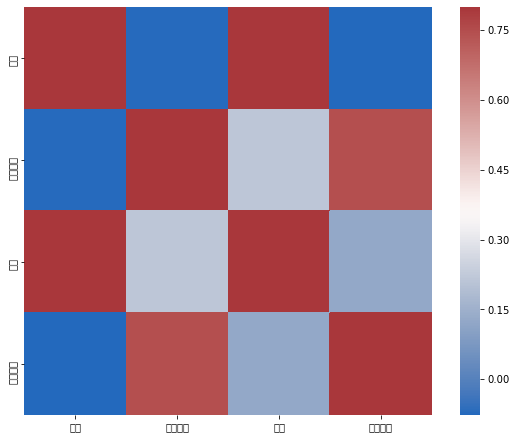

In [44]:
#correlation matrix
corrmat = df_mix[num_cols].corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='vlag')

In [45]:
df_mix[num_cols]

,胎次,泌乳天數,月齡,配種次數
0,1,78.0,26,1
1,1,107.0,27,1
2,1,140.0,28,2
3,1,175.0,29,2
4,1,210.0,30,2
...,...,...,...,...
37512,8,12.0,130,0
37513,8,137.0,134,0
37514,8,168.0,135,0
37515,8,197.0,136,0


In [46]:
df_mix['泌乳天數'] = df_mix['泌乳天數'].fillna(0)

In [47]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# apply standardization on numerical features
for i in num_cols:
#     df_mix[i] = df_mix[i].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # fit on training data column
    scale = StandardScaler().fit(df_mix[[i]])
    
    # transform the training data column
    df_mix[i] = scale.transform(df_mix[[i]])


In [48]:
from scipy import stats
from scipy.stats import norm, skew

num_feats = df_mix.dtypes[num_cols].index

# Check the skew of all numerical features
skewed_feats = df_mix[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
配種次數,1.834887
胎次,1.728673
月齡,1.477721
泌乳天數,1.132558


In [49]:
# skewed_feats = df_mix[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [50]:
df_mix_class = df_mix['乳量']
df_mix.drop(columns='乳量',inplace=True)
df_mix = pd.concat([df_mix, df_mix_class], axis=1, join="outer")
df_mix

,ID,出生日期,胎次,泌乳天數,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,配種次數,第一次配種日期,最後配種精液_001HI11048,最後配種精液_001HO01149,最後配種精液_001HO02611,最後配種精液_001HO02724,最後配種精液_001HO09527,最後配種精液_001HO09593,最後配種精液_001HO11014,最後配種精液_001HO11048,最後配種精液_001HO11149,最後配種精液_001HO11511,最後配種精液_001HO11545,最後配種精液_001HO11693,最後配種精液_001HO12901,最後配種精液_001HO12927,最後配種精液_001HO1297,最後配種精液_004HO12927,最後配種精液_005HO53812,最後配種精液_005HO54028,最後配種精液_007H12901,最後配種精液_007HO09281,最後配種精液_007HO11123,最後配種精液_007HO11207,最後配種精液_007HO11223,最後配種精液_007HO11283,最後配種精液_007HO11456,最後配種精液_007HO11546,最後配種精液_007HO11585,最後配種精液_007HO11621,最後配種精液_007HO11757,最後配種精液_007HO11777,最後配種精液_007HO12026,最後配種精液_007HO12095,最後配種精液_007HO12111,最後配種精液_007HO12175,最後配種精液_007HO12832,最後配種精液_007HO12901,最後配種精液_007JE01350,最後配種精液_011HO09956,最後配種精液_011HO11173,最後配種精液_011HO11192,最後配種精液_011HO11201,最後配種精液_011HO11511,最後配種精液_011HO11566,最後配種精液_014HO06263,最後配種精液_014HO07700,最後配種精液_029HO11784,最後配種精液_029HO11833,最後配種精液_029HO13494,最後配種精液_029HO14132,最後配種精液_029HO14390,最後配種精液_029HO14487,最後配種精液_029HO16160,最後配種精液_029HO16473,最後配種精液_029HO16981,最後配種精液_029HO17084,最後配種精液_029HO17784,最後配種精液_029HO17944,最後配種精液_029HO18438,最後配種精液_055H999,最後配種精液_11H10360,最後配種精液_11H10469,最後配種精液_11H11014,最後配種精液_11H11192,最後配種精液_11H11201,最後配種精液_11H2611,最後配種精液_11H9754,最後配種精液_11H9956,最後配種精液_1202,最後配種精液_14H5157,最後配種精液_14H5617,最後配種精液_14H6080,最後配種精液_14H6263,最後配種精液_151H0699,最後配種精液_151HO00699,最後配種精液_151HO00718,最後配種精液_151HO00727,最後配種精液_151HO00756,最後配種精液_1H11014,最後配種精液_1H1140,最後配種精液_1H11511,最後配種精液_1H2611,最後配種精液_1H2724,最後配種精液_1H2747,最後配種精液_1H7127,最後配種精液_1H9085,最後配種精液_1H9225,最後配種精液_1H9315,最後配種精液_1H9527,最後配種精液_1H9593,...,第一次配種精液_501H2747,第一次配種精液_501H5862,第一次配種精液_501H8778,第一次配種精液_501H8784,第一次配種精液_501H9952,第一次配種精液_501H9997,第一次配種精液_501HO11318,第一次配種精液_501HO11670,第一次配種精液_507H10429,第一次配種精液_507H11351,第一次配種精液_507H11352,第一次配種精液_507H11621,第一次配種精液_507H12236,第一次配種精液_507H8747,第一次配種精液_507HO10849,第一次配種精液_507HO11488,第一次配種精液_507HO12236,第一次配種精液_509HO11833,第一次配種精液_509HO12026,第一次配種精液_509HO12236,第一次配種精液_511H10814,第一次配種精液_511HO11348,第一次配種精液_523HO01513,第一次配種精液_536H351,第一次配種精液_536H353,第一次配種精液_536H531,第一次配種精液_536HO00531,第一次配種精液_551H0272,第一次配種精液_551H0665,第一次配種精液_551H0680,第一次配種精液_551H0699,第一次配種精液_551H0727,第一次配種精液_551H10680,第一次配種精液_551H3017,第一次配種精液_551H3127,第一次配種精液_551HO00680,第一次配種精液_551HO00681,第一次配種精液_551HO00687,第一次配種精液_551HO00695,第一次配種精液_551HO00699,第一次配種精液_551HO00718,第一次配種精液_551HO03017,第一次配種精液_551HO03127,第一次配種精液_551HO03370,第一次配種精液_5H53812,第一次配種精液_5H54028,第一次配種精液_601H11670,第一次配種精液_601HO01670,第一次配種精液_601HO11670,第一次配種精液_601HO11678,第一次配種精液_614HO04811,第一次配種精液_614HO07276,第一次配種精液_614HO07525,第一次配種精液_614HO07811,第一次配種精液_614HO07844,第一次配種精液_7H10217,第一次配種精液_7H10233,第一次配種精液_7H10272,第一次配種精液_7H10406,第一次配種精液_7H10433,第一次配種精液_7H10550,第一次配種精液_7H10604,第一次配種精液_7H10624,第一次配種精液_7H10690,第一次配種精液_7H10721,第一次配種精液_7H10723,第一次配種精液_7H10884,第一次配種精液_7H11030,第一次配種精液_7H11207,第一次配種精液_7H11283,第一次配種精液_7H11456,第一次配種精液_7H11581,第一次配種精液_7H11585,第一次配種精液_7H12175,第一次配種精液_7H1585,第一次配種精液_7H7532,第一次配種精液_7H7536,第一次配種精液_7H7763,第一次配種精液_7H8350,第一次配種精液_7H8559,第一次配種精液_7H8778,第一次配種精液_7H8787,第一次配種精液_7H9222,第一次配種精液_7H9281,第一次配種精液_7H9346,第一次配種精液_7H9754,第一次配種精液_7H9900,第一次配種精液_7H9925,第一次配種精液_7H9961,第一次配種精液_H01,第一次配種精液_H02,第一次配種精液_J5H54028,第一次配種精液_JP5H54028,第一次配種精液_T222,第一次配種精液_TW1HO00521,第一次配種精液_other,酪農場代號_A,酪農場代號_B,酪農場代號_C,乳量
0,1,-0.643708,-0.784807,-0.847490,-1.560312,-1.800872,-1.114501,-1.800873,-0.735682,-0.453040,-1.529748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,29.4
1,2,-0.643708,-0.784807,-0.653804,-1.560312,-1.758724,-1.062572,-1.758742,-0.735682,-0.453040,-1.529748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.

In [51]:
# # correlation matrix
# df_mix_cor = df_mix - df_mix[cooc_cols] + df_mix['class']
# # df_mix_cor
# corrmat = df_mix_cor.corr()
# f, ax = plt.subplots(figsize=(10, 7.5))
# sns.heatmap(corrmat, vmax=.8, square=True, cmap='vlag')

In [52]:
# # correlation matrix
# df_num_cor = df_mix[num_cols] + df_mix['class']
# # df_mix_cor
# corrmat = df_num_cor.corr()
# f, ax = plt.subplots(figsize=(10, 7.5))
# sns.heatmap(corrmat, vmax=.8, square=True, cmap='vlag')

In [53]:
# # correlation matrix
# df_cat_cor = df_mix[cat_cols] + df_mix['class']
# # df_mix_cor
# corrmat = df_cat_cor.corr()
# f, ax = plt.subplots(figsize=(10, 7.5))
# sns.heatmap(corrmat, vmax=.8, square=True, cmap='vlag')

In [54]:
# # correlation matrix
# df_bin_cor = df_mix[binary_cols] + df_mix['class']
# # df_mix_cor
# corrmat = df_bin_cor.corr()
# f, ax = plt.subplots(figsize=(10, 7.5))
# sns.heatmap(corrmat, vmax=.8, square=True, cmap='vlag')

In [55]:
for i in df_mix.columns:
    if df_mix[i].isna().sum():
        print(f"{i}\t\t:{df_mix[i].isna().sum()}/{df_mix.__len__()} : {df_mix[i].isna().sum()/df_mix.__len__() * 100:.2f}%")

乳量		:4263/37517 : 11.36%


# Train and Test Separation

In [56]:
df_test = df_mix[df_mix['乳量'].isna()]

df_train = df_mix.dropna(subset=['乳量'])
# df_mix.iloc[[df_mix["MilkVolume"].isna()]]

# Pandas to Numpy Array

In [57]:
X_ = df_train.iloc[:, :-1]
X_train = X_.values  # 將 dataframe 轉換成 ndarray 的資料型態

X_ = df_test.iloc[:, :-1]
X_test = X_.values  # 將 dataframe 轉換成 ndarray 的資料型態

In [58]:
y_train = df_train['乳量']
# # 做 One-hot encoding
# y_train = keras.utils.to_categorical(y_train)
y_train

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
37512    20.0
37513    21.0
37514    19.0
37515    12.0
37516    10.0
Name: 乳量, Length: 33254, dtype: float64

In [59]:
y_test = df_test['乳量'].fillna(0)
# y_test = keras.utils.to_categorical(y_test)
y_test

479      0.0
741      0.0
742      0.0
743      0.0
744      0.0
        ... 
37480    0.0
37481    0.0
37482    0.0
37483    0.0
37484    0.0
Name: 乳量, Length: 4263, dtype: float64

In [60]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [61]:
count = 0

# Build Model

In [62]:
# from tensorflow.keras import initializers

# initial = initializers.he_normal()

In [63]:
# def build_model(X_train):

#     tf.random.set_seed(10)  # 固定隨機產生的數字序列
#     drp_rate = 0.2
#     model = keras.Sequential()

#     model.add(layers.Dense(65536, kernel_initializer=initial, kernel_regularizer='l2', input_dim=X_train.shape[1]))
#     model.add(layers.Activation('relu'))
#     model.add(layers.BatchNormalization())
    
#     model.add(layers.Dense(1024, kernel_regularizer='l1'))
#     model.add(layers.Activation('relu'))
#     model.add(layers.Dropout(drp_rate))
    
#     model.add(layers.Dense(512))
#     model.add(layers.Activation('relu'))
#     model.add(layers.Dropout(drp_rate))

#     model.add(layers.Dense(6))
# #     model.add(layers.Activation('softmax'))

#     return model

In [64]:
# model = build_model(X_train)
# model.summary()

In [65]:
# import sys
# print(sys.base_prefix)
# import pip
# pip.main(['install', '<package>'])

In [66]:
# !pip install xgboost

In [77]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 


In [79]:
# fit model no training data
model = XGBRegressor(verbosity=1) 
model.fit(X_train,y_train)
y_test = model.predict(X_test)

# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1, gamma=0,
#        importance_type='gain', learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=None, subsample=1, verbosity=1)

[16:07:46] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [81]:
print(y_test)

[17.448349 28.260109 29.92277  ... 14.14432  15.837893 13.344527]


In [84]:
os.getcwd()
count = 0
sub = pd.read_csv('/home/jovyan/midterm/aidea/data/submission.csv')
test_submission = pd.DataFrame({'ID':sub['ID'], '1': y_test})
test_submission.to_csv(f'./milk_submission_{count}.csv', index = False)


# Visualization Evaluation

In [ ]:
# layer_name = 'activation'
# intermediate_layer_model = Model(inputs=model.input,
#                                  outputs=model.get_layer(layer_name).output)
# intermediate_output = intermediate_layer_model.predict(data)